In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("df_voicemail_true.csv")
df.head()

,churn,accountlength,internationalplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
0,0,128.0,0,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1.0
1,0,107.0,0,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0
2,0,121.0,0,24.0,218.2,88.0,348.5,108.0,212.6,118.0,7.5,7.0,3.0
3,0,141.0,1,37.0,258.6,84.0,222.0,111.0,326.4,97.0,11.2,5.0,0.0
4,0,85.0,0,27.0,196.4,139.0,280.9,90.0,89.3,75.0,13.8,4.0,1.0


In [23]:
df.shape

(1323, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       1323 non-null   int64  
 1   accountlength               1323 non-null   float64
 2   internationalplan           1323 non-null   int64  
 3   numbervmailmessages         1323 non-null   float64
 4   totaldayminutes             1323 non-null   float64
 5   totaldaycalls               1323 non-null   float64
 6   totaleveminutes             1323 non-null   float64
 7   totalevecalls               1323 non-null   float64
 8   totalnightminutes           1323 non-null   float64
 9   totalnightcalls             1323 non-null   float64
 10  totalintlminutes            1323 non-null   float64
 11  totalintlcalls              1323 non-null   float64
 12  numbercustomerservicecalls  1323 non-null   float64
dtypes: float64(11), int64(2)
memory u

In [25]:
df.columns

Index(['churn', 'accountlength', 'internationalplan', 'numbervmailmessages',
       'totaldayminutes', 'totaldaycalls', 'totaleveminutes', 'totalevecalls',
       'totalnightminutes', 'totalnightcalls', 'totalintlminutes',
       'totalintlcalls', 'numbercustomerservicecalls'],
      dtype='object')

In [26]:
num_cols = ['accountlength', 'numbervmailmessages', 'totaldayminutes', 'totaldaycalls', 'totaleveminutes', 'totalevecalls', 'totalnightminutes', 'totalnightcalls', 'totalintlminutes', 'totalintlcalls', 'numbercustomerservicecalls']
cat_cols = ['internationalplan']

In [27]:
X = df.drop(columns = ['churn'])
y = df['churn']

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['GVIF'] = np.sqrt(vif['VIF'])
print(vif)

## Multicolinearity does not exist

                      Variable        VIF      GVIF
0                accountlength   7.141827  2.672420
1            internationalplan   1.117522  1.057129
2          numbervmailmessages  13.630076  3.691893
3              totaldayminutes  11.979813  3.461187
4                totaldaycalls  22.839705  4.779090
5              totaleveminutes  15.931947  3.991484
6                totalevecalls  22.852103  4.780387
7            totalnightminutes  15.545145  3.942733
8              totalnightcalls  22.174433  4.708974
9             totalintlminutes  13.785599  3.712896
10              totalintlcalls   4.076176  2.018954
11  numbercustomerservicecalls   2.408049  1.551789


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [30]:
X_train.head()

,accountlength,internationalplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
1062,131.0,0,29.0,42.1,114.0,183.3,70.0,158.7,82.0,10.0,1.0,0.0
479,17.0,0,35.0,198.5,123.0,270.6,74.0,209.9,130.0,8.1,10.0,1.0
724,147.0,1,35.0,157.5,109.0,189.6,67.0,227.0,76.0,11.1,2.0,3.0
40,115.0,0,24.0,142.1,124.0,183.4,129.0,164.8,114.0,9.6,4.0,1.0
22,128.0,0,29.0,179.3,104.0,225.9,86.0,323.0,78.0,8.6,7.0,0.0


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1058, 12)
(265, 12)
(1058,)
(265,)


In [32]:
X_train.head()

,accountlength,internationalplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
1062,131.0,0,29.0,42.1,114.0,183.3,70.0,158.7,82.0,10.0,1.0,0.0
479,17.0,0,35.0,198.5,123.0,270.6,74.0,209.9,130.0,8.1,10.0,1.0
724,147.0,1,35.0,157.5,109.0,189.6,67.0,227.0,76.0,11.1,2.0,3.0
40,115.0,0,24.0,142.1,124.0,183.4,129.0,164.8,114.0,9.6,4.0,1.0
22,128.0,0,29.0,179.3,104.0,225.9,86.0,323.0,78.0,8.6,7.0,0.0


In [33]:
# With Smote

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state = 100)

X_train, y_train = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 978, 1: 80})
After SMOTE: Counter({0: 978, 1: 978})


In [35]:
X_train.shape

(1956, 12)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
lr = LogisticRegression(random_state = 100)

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(list(y_test), y_pred_lr)
print("Logistic Regression Accuracy: ", lr_accuracy*100)

Logistic Regression Accuracy:  72.0754716981132


In [38]:
## Hyperparameter Tuning with Cross-Validation for Logistic Regression

# Define hyperparameters for logistic regression
lr_params = {
    'penalty': ['l1', 'l2'], # Regularization type
    'C': [0.2, 0.22, 0.25], # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'], # Solvers available for these penalties
}

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search_lr = GridSearchCV(lr, lr_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')

# Fit the model on the training data for hyperparameter tuning
grid_search_lr.fit(X_train, y_train)

# Get the best estimator and hyperparameters
best_lr = grid_search_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)

# Evaluate training performance with best model
y_train_pred_lr = best_lr.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print("Logistic Regression Training Accuracy: ", train_accuracy_lr * 100)
lr_cls_train = classification_report(y_train, y_train_pred_lr)
print("Logistic Regression Classification Report for Train Set:\n", lr_cls_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Logistic Regression Parameters: {'C': 0.25, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Training Accuracy:  72.4437627811861
Logistic Regression Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       978
           1       0.73      0.71      0.72       978

    accuracy                           0.72      1956
   macro avg       0.72      0.72      0.72      1956
weighted avg       0.72      0.72      0.72      1956



Logistic Regression Test Accuracy:  72.0754716981132


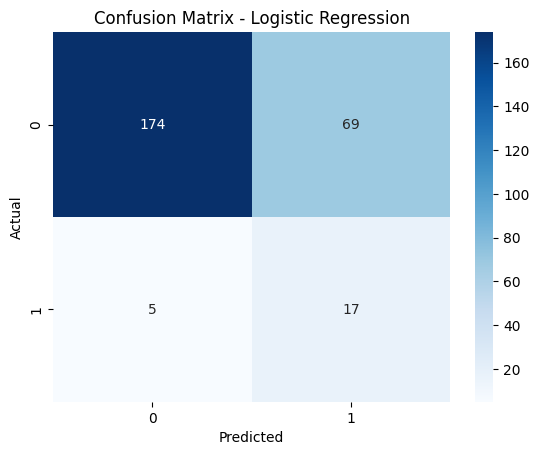

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.82       243
           1       0.20      0.77      0.31        22

    accuracy                           0.72       265
   macro avg       0.58      0.74      0.57       265
weighted avg       0.91      0.72      0.78       265



In [39]:
# Make predictions on the test set with the best model
y_pred_lr = best_lr.predict(X_test)

# Evaluate test performance
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cls = classification_report(y_test, y_pred_lr)

print("Logistic Regression Test Accuracy: ", lr_accuracy * 100)

sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("Logistic Regression Classification Report:\n", lr_cls)

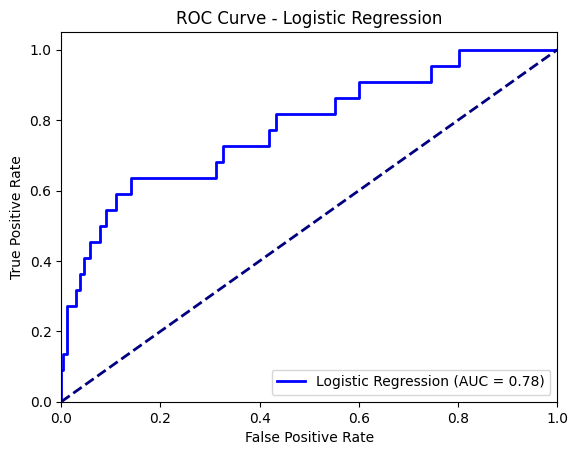

In [40]:
## ROC Curve

y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## SVM

In [41]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(probability=True, random_state=100)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: ", svm_accuracy*100)

SVM Accuracy:  49.056603773584904


## Hyperparameter Tuning with Cross-Validation for SVM

## Define grid
svm_params = {
    'C': [2.2, 2.3, 2.4],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_svm = GridSearchCV(svm, svm_params, cv=3, verbose=1, n_jobs=-1, scoring='f1')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_svm = grid_search_svm.best_estimator_
print("Best SVM Parameters:", grid_search_svm.best_params_)

# Training performance
y_train_pred_svm = best_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print("SVM Training Accuracy: ", train_accuracy_svm*100)
svm_cls_train = classification_report(y_train, y_train_pred_svm)
print("SVM Classification Report for Train Set:\n", svm_cls_train)

SVM Accuracy:  49.056603773584904


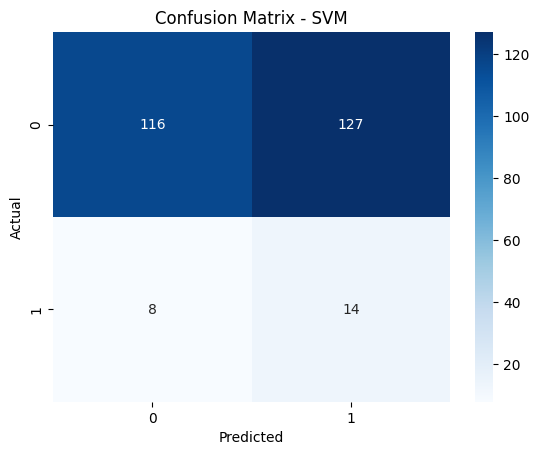

              precision    recall  f1-score   support

           0       0.71      0.49      0.58       978
           1       0.61      0.80      0.69       978

    accuracy                           0.65      1956
   macro avg       0.66      0.65      0.64      1956
weighted avg       0.66      0.65      0.64      1956

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.48      0.63       243
           1       0.10      0.64      0.17        22

    accuracy                           0.49       265
   macro avg       0.52      0.56      0.40       265
weighted avg       0.87      0.49      0.59       265



In [43]:
# Make predictions with the best model
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_cls = classification_report(y_test, y_pred_svm)

print("SVM Accuracy: ", svm_accuracy*100)

sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()
y_train_pred_svm = svm.predict(X_train)
svm_cls_train = classification_report(y_train, y_train_pred_svm)
print(svm_cls_train)
print("SVM Classification Report:\n", svm_cls)

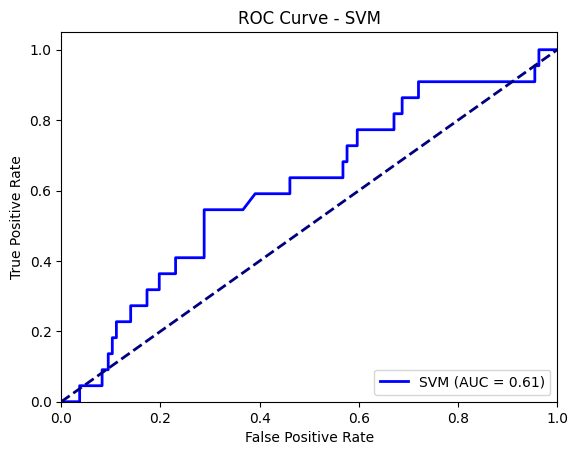

In [90]:
## ROC Curve

y_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: ", knn_accuracy*100)

KNN Accuracy:  67.16981132075472


In [45]:
## Hyperparameter Tuning with Cross-Validation for KNN

knn_params = {
    'n_neighbors': [2, 3],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting of points
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Adjust `p` if `minkowski` metric is selected
if 'minkowski' in knn_params['metric']:
    knn_params['p'] = [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn, knn_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_knn = grid_search_knn.best_estimator_
print("Best KNN Parameters:", grid_search_knn.best_params_)

# Training performance
y_train_pred_knn = best_knn.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print("KNN Training Accuracy: ", train_accuracy_knn*100)
knn_cls_train = classification_report(y_train, y_train_pred_knn)
print("KNN Classification Report for Train Set:\n", knn_cls_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
KNN Training Accuracy:  99.79550102249489
KNN Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



KNN Accuracy:  80.75471698113208


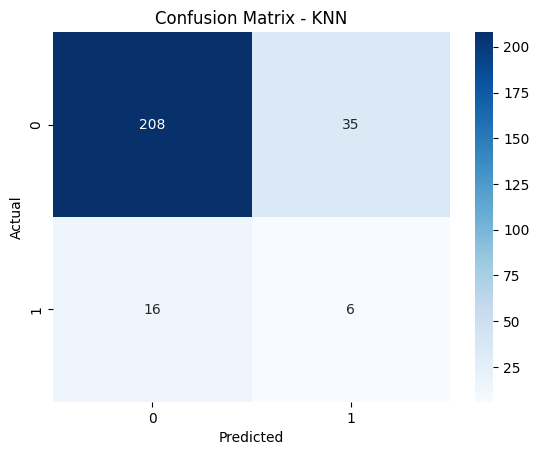

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       243
           1       0.15      0.27      0.19        22

    accuracy                           0.81       265
   macro avg       0.54      0.56      0.54       265
weighted avg       0.86      0.81      0.83       265



In [46]:
# Make predictions with the best model
y_pred_knn = best_knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)
knn_cls = classification_report(y_test, y_pred_knn)

print("KNN Accuracy: ", knn_accuracy*100)

sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

print("KNN Classification Report:\n", knn_cls)

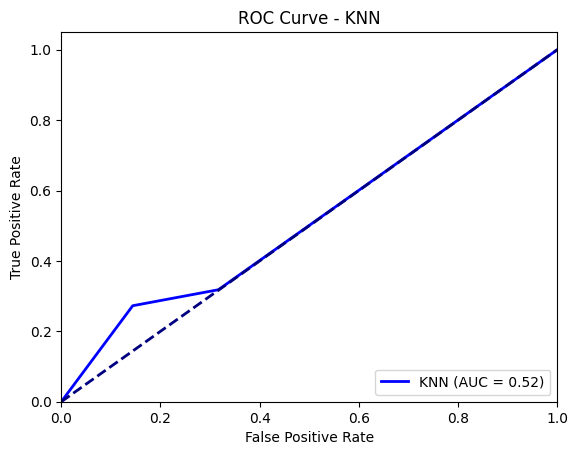

In [94]:
## ROC Curve

y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(random_state=100)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: ", dt_accuracy*100)

Decision Tree Accuracy:  89.81132075471699


In [96]:
## Hyperparameter Tuning with Cross-Validation for Decision Tree Classifier

dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'], # Criterion for splitting
    'max_depth': [None, 10], # Maximum depth of the tree
    'min_samples_split': [2, 3, 4], # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required in a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'], # Number of features to consider for the best split 
    'max_leaf_nodes': [None, 1, 10]
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_dt = GridSearchCV(dt, dt_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)

# Training performance
y_train_pred_dt = best_dt.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print("Decision Tree Training Accuracy: ", train_accuracy_dt*100)
dt_cls_train = classification_report(y_train, y_train_pred_dt)
print("Decision Tree Classification Report for Train Set:\n", dt_cls_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Training Accuracy:  100.0
Decision Tree Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



Decision Tree Accuracy:  89.81132075471699


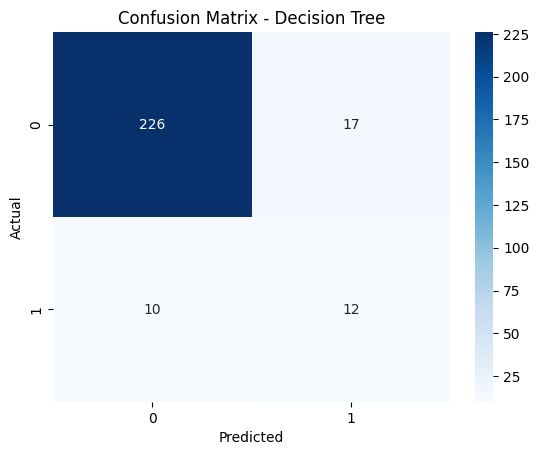

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       243
           1       0.41      0.55      0.47        22

    accuracy                           0.90       265
   macro avg       0.69      0.74      0.71       265
weighted avg       0.91      0.90      0.90       265



In [97]:
# Make predictions with the best model
y_pred_dt = best_dt.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_cls = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy: ", dt_accuracy*100)

sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("Decision Tree Classification Report:\n", dt_cls)

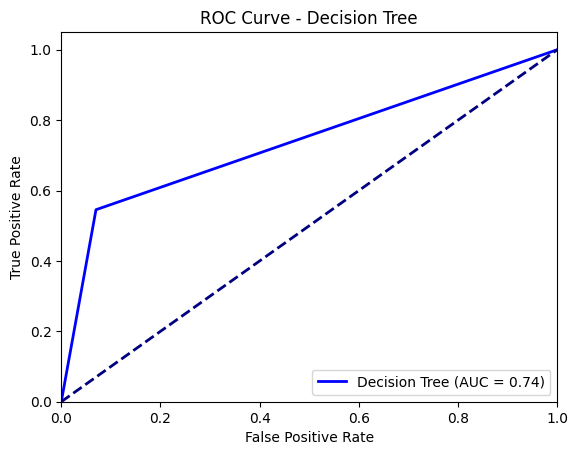

In [98]:
## ROC Curve

y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf = RandomForestClassifier(random_state=100)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy: ", rf_accuracy*100)

Random Forest Classifier Accuracy:  93.9622641509434


In [100]:
## Hyperparameter Tuning with Cross-Validation for Random Forest

# Define hyperparameters for random forest
rf_params = {
    'n_estimators': [1300, 1400], # Number of trees restricted
    'max_depth': [10, 15], # Maximum depth of the tree
    'min_samples_split': [6, 8], # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 3],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True],  # Whether bootstrap samples are used when building trees
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf, rf_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')

# Fit the model on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Training performance
y_train_pred_rf = best_rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy: ", train_accuracy_rf*100)
rf_cls_train = classification_report(y_train, y_train_pred_rf)
print("Random Forest Classification Report for Train Set:\n", rf_cls_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1400}
Random Forest Training Accuracy:  99.94887525562373
Random Forest Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



Random Forest Classifier Accuracy:  92.83018867924528


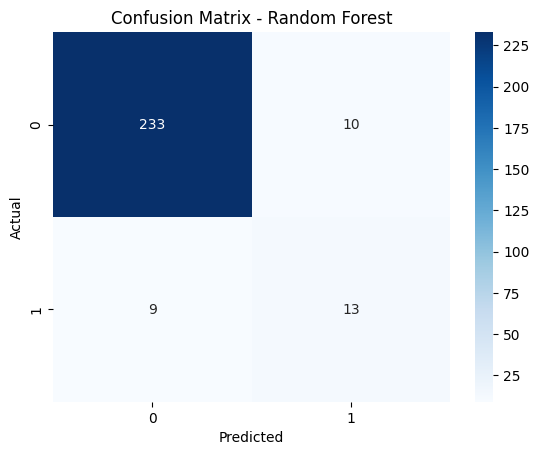

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       243
           1       0.57      0.59      0.58        22

    accuracy                           0.93       265
   macro avg       0.76      0.77      0.77       265
weighted avg       0.93      0.93      0.93       265



In [101]:
# Make predictions with the best model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
rf_cm = confusion_matrix(y_test, y_pred_best_rf)
rf_cls = classification_report(y_test, y_pred_best_rf)

print("Random Forest Classifier Accuracy: ", rf_accuracy*100)

sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("Random Forest Classifier Classification Report:\n", rf_cls)

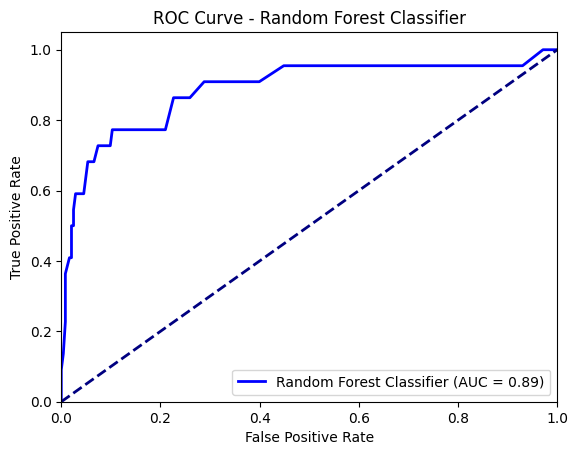

In [102]:
## ROC Curve

y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest Classifier (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## Gaussian Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy: ", gnb_accuracy*100)

Gaussian Naive Bayes Accuracy:  78.49056603773586


## Hyperparameter Tuning with Cross-Validation for Gaussian Naive Bayes

# Define hyperparameters for GNB
gnb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.001, 0.01]  # Control smoothing applied to variance estimates
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_gnb = GridSearchCV(gnb, gnb_params, cv=10, verbose=1, n_jobs=-1, scoring='f1')
grid_search_gnb.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_gnb = grid_search_gnb.best_estimator_
print("Best GNB Parameters:", grid_search_gnb.best_params_)

# Training performance
y_train_pred_gnb = gnb.predict(X_train)
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
print("Gaussian Naive Bayes Training Accuracy: ", train_accuracy_gnb*100)
gnb_cls_train = classification_report(y_train, y_train_pred_gnb)
print("Gaussian Naive Bayes Classification Report for Train Set:\n", gnb_cls_train)

Gaussian Naive Bayes Accuracy:  78.49056603773586


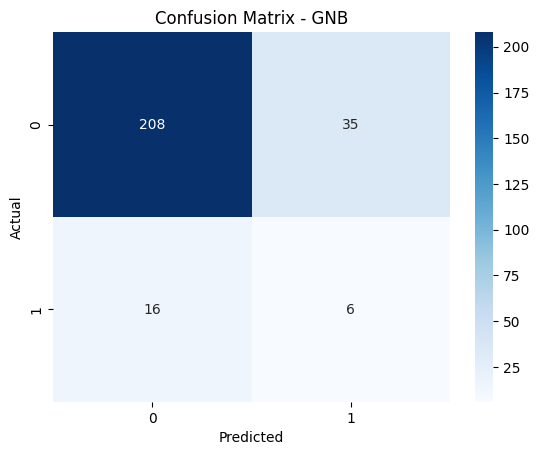

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       243
           1       0.24      0.73      0.36        22

    accuracy                           0.78       265
   macro avg       0.60      0.76      0.62       265
weighted avg       0.91      0.78      0.83       265



In [104]:
# Make predictions with the best model
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_cm = confusion_matrix(y_test, y_pred_gnb)
gnb_cls = classification_report(y_test, y_pred_gnb)

print("Gaussian Naive Bayes Accuracy: ", gnb_accuracy*100)

sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GNB')
plt.show()

print("Gaussian Naive Bayes Classification Report:\n", gnb_cls)

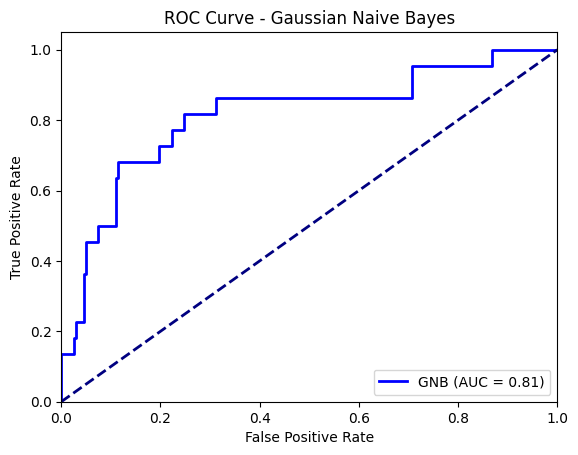

In [105]:
## ROC Curve

y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure()
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label='GNB (AUC = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## LightGBM

In [106]:
from lightgbm import LGBMClassifier

# Initialize the LGBMClassifier model
lgbm = LGBMClassifier(random_state=100, force_col_wise=True)

# Train the model
lgbm.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy: ", lgbm_accuracy*100)

[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Total Bins 2806
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy:  94.71698113207547


In [107]:
## Hyperparameter Tuning with Cross-Validation for LightGBM

# Define the hyperparameter grid for LightGBM
lgbm_params = {
    'num_leaves': [50, 60],            # Max number of leaves
    'learning_rate': [0.01, 0.05],     # Learning rate
    'n_estimators': [1200, 1500],        # Number of boosting rounds
    'min_child_samples': [60, 70],      # Minimum number of data points in a leaf
    'max_depth': [5, 7],                  # Tree depth
    'reg_alpha': [0.01, 0.1],             # L1 regularization
    'reg_lambda': [0.01, 0.1],            # L2 regularization
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_lgbm = GridSearchCV(lgbm, lgbm_params, cv=2, verbose=1, n_jobs=-1, scoring='f1')
grid_search_lgbm.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_lgbm = grid_search_lgbm.best_estimator_
print("Best LightGBM Parameters:", grid_search_lgbm.best_params_)

# Training performance
y_train_pred_lgbm = best_lgbm.predict(X_train)
train_accuracy_lgbm = accuracy_score(y_train, y_train_pred_lgbm)
print("LightGBM Training Accuracy: ", train_accuracy_lgbm*100)
lgbm_cls_train = classification_report(y_train, y_train_pred_lgbm)
print("LightGBM Classification Report for Train Set:\n", lgbm_cls_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Total Bins 2806
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LightGBM Accuracy:  95.09433962264151


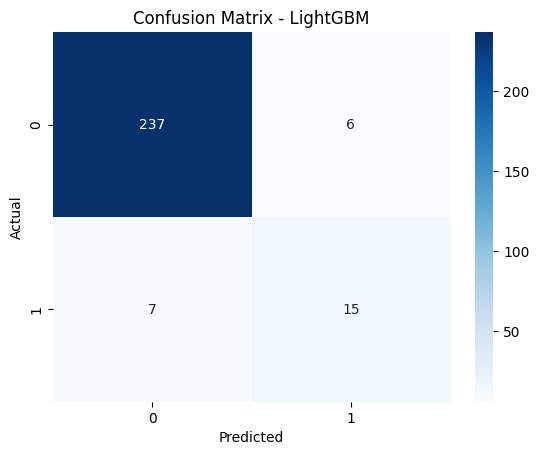

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       243
           1       0.71      0.68      0.70        22

    accuracy                           0.95       265
   macro avg       0.84      0.83      0.84       265
weighted avg       0.95      0.95      0.95       265



In [108]:
# Make predictions with the best model
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_cm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_cls = classification_report(y_test, y_pred_lgbm)

print("LightGBM Accuracy: ", lgbm_accuracy*100)

sns.heatmap(lgbm_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

print("LightGBM Classification Report:\n", lgbm_cls)

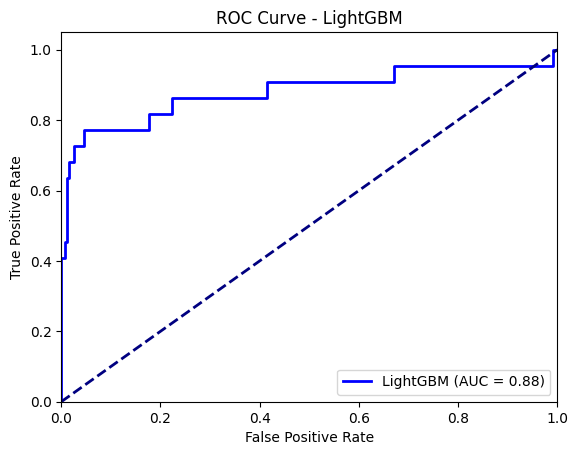

In [109]:
## ROC Curve

y_prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lgbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

## AdaBoost Classifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada = AdaBoostClassifier(random_state=100)

# Train the model
ada.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy: ", ada_accuracy*100)

AdaBoost Accuracy:  86.41509433962264


In [111]:
## Hyperparameter Tuning with Cross-Validation for AdaBoost Classifier

# Define hyperparameters for AdaBoost
ada_params = {
    'n_estimators': [200, 500],
    'learning_rate': [0.05, 0.1],
    'algorithm': ['SAMME.R']
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_ada = GridSearchCV(ada, ada_params, cv=5, verbose=1, n_jobs=-1, scoring='f1')
grid_search_ada.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_ada = grid_search_ada.best_estimator_
print("Best AdaBoost Parameters:", grid_search_ada.best_params_)

# Training performance
y_train_pred_ada = best_ada.predict(X_train)
train_accuracy_ada = accuracy_score(y_train, y_train_pred_ada)
print("AdaBoost Training Accuracy: ", train_accuracy_ada*100)
ada_cls_train = classification_report(y_train, y_train_pred_ada)
print("AdaBoost Classification Report for Train Set:\n", ada_cls_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best AdaBoost Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 500}
AdaBoost Training Accuracy:  91.30879345603272
AdaBoost Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       978
           1       0.92      0.90      0.91       978

    accuracy                           0.91      1956
   macro avg       0.91      0.91      0.91      1956
weighted avg       0.91      0.91      0.91      1956



AdaBoost Accuracy:  87.16981132075472


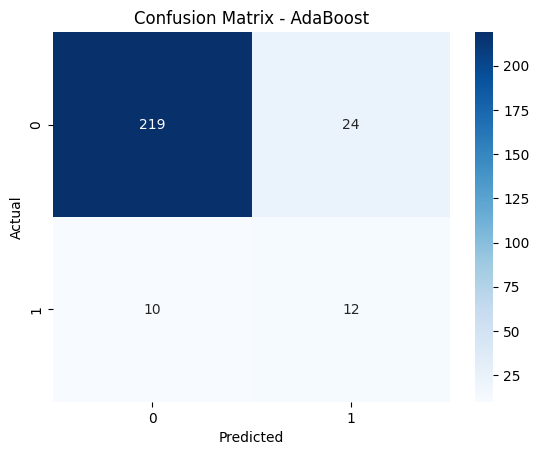

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       243
           1       0.33      0.55      0.41        22

    accuracy                           0.87       265
   macro avg       0.64      0.72      0.67       265
weighted avg       0.90      0.87      0.89       265



In [112]:
# Make predictions with the best model
y_pred_ada = best_ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_cm = confusion_matrix(y_test, y_pred_ada)
ada_cls = classification_report(y_test, y_pred_ada)

print("AdaBoost Accuracy: ", ada_accuracy*100)

sns.heatmap(ada_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

print("AdaBoost Classification Report:\n", ada_cls)

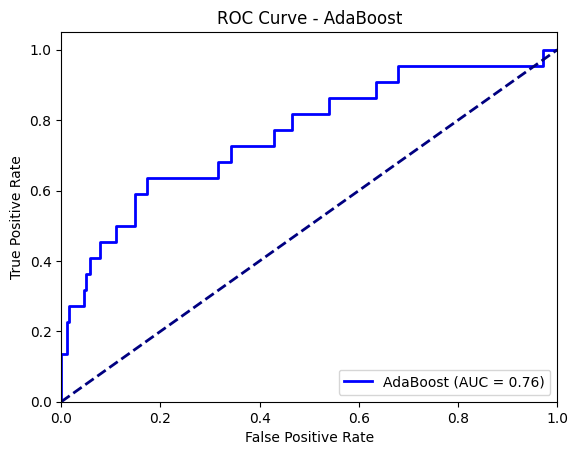

In [113]:
## ROC Curve

y_prob_ada = ada.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure()
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [114]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=100, eval_metric='logloss')

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy: ", xgb_accuracy*100)

XGBoost Classifier Accuracy:  95.09433962264151


In [115]:
## Hyperparameter Tuning with Cross-Validation for XGBoost Classifier

# Define the hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [3000, 4000], # Number of boosting rounds (trees)
    'max_depth': [5, 7], # Maximum depth of a tree
    'learning_rate': [0.01], # Step size for each boosting step
    'subsample': [1], # Subsampling of the training data per tree
    'colsample_bytree': [0.8, 1], # Fraction of features to consider for each tree
    'gamma': [0.1], # Minimum loss reduction to create a split
    'reg_alpha': [0.1], # L1 regularization term
    'reg_lambda': [1] # L2 regularization term
}

# Use GridSearchCV to perform hyperparameter tuning with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

# Fit the model on the training data with hyperparameter tuning
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best estimator after tuning
best_xgb = grid_search_xgb.best_estimator_
print("Best Parameters from Grid Search:", grid_search_xgb.best_params_)

# Training performance
y_train_pred_xgb = best_xgb.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print("XGBoost Training Accuracy: ", train_accuracy_xgb*100)
xgb_cls_train = classification_report(y_train, y_train_pred_xgb)
print("Logistic Regression Classification Report for Train Set:\n", xgb_cls_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters from Grid Search: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 3000, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1}
XGBoost Training Accuracy:  100.0
Logistic Regression Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



XGBoost Accuracy:  95.47169811320755


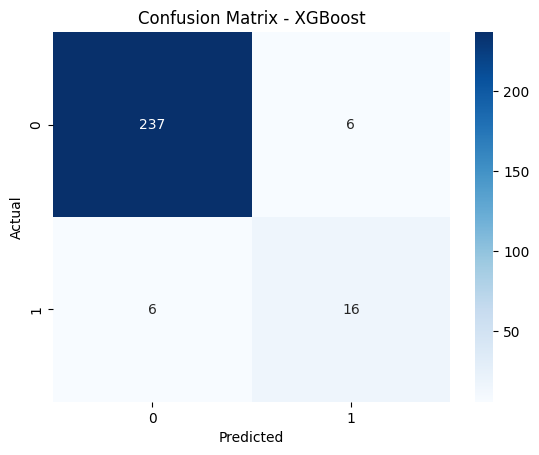

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.73      0.73      0.73        22

    accuracy                           0.95       265
   macro avg       0.85      0.85      0.85       265
weighted avg       0.95      0.95      0.95       265



In [116]:
# Make predictions on the test set using the best model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model
xgb_best_accuracy = accuracy_score(y_test, y_pred_best_xgb)
xgb_best_cm = confusion_matrix(y_test, y_pred_best_xgb)
xgb_best_cls = classification_report(y_test, y_pred_best_xgb)

print("XGBoost Accuracy: ", xgb_best_accuracy*100)

sns.heatmap(xgb_best_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

print("XGBoost Classification Report:\n", xgb_best_cls)

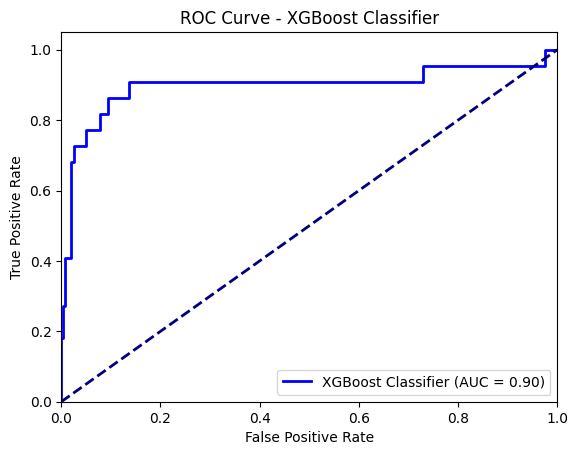

In [117]:
## ROC Curve

y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost Classifier (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

## GBM

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=100)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print("GBM Classifier Accuracy: ", gbm_accuracy * 100)

GBM Classifier Accuracy:  93.58490566037736


In [119]:
## Hyperparameter Tuning with Cross-Validation for GBM

# Define the hyperparameter grid for GBM
gbm_params = {
    'n_estimators': [100, 200],  # Number of boosting rounds (trees)
    'max_depth': [3, 5],         # Maximum depth of a tree
    'learning_rate': [0.05, 0.1], # Step size for each boosting step
    'subsample': [0.8, 1.0],     # Subsampling of the training data per tree
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [1, 3]    # Minimum samples in a leaf node
}

# Use GridSearchCV to perform hyperparameter tuning with 5-fold cross-validation
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=gbm_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

# Fit the model on the training data with hyperparameter tuning
grid_search_gbm.fit(X_train, y_train)

# Get the best parameters and the best estimator after tuning
best_gbm = grid_search_gbm.best_estimator_
print("Best Parameters from Grid Search:", grid_search_gbm.best_params_)

# Training performance
y_train_pred_gbm = best_gbm.predict(X_train)
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)
print("GBM Training Accuracy: ", train_accuracy_gbm * 100)
gbm_cls_train = classification_report(y_train, y_train_pred_gbm)
print("GBM Classification Report for Train Set:\n", gbm_cls_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
GBM Training Accuracy:  100.0
GBM Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



GBM Accuracy:  94.71698113207547


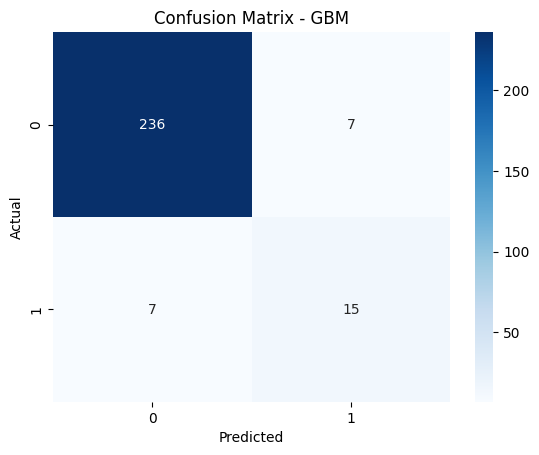

GBM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       243
           1       0.68      0.68      0.68        22

    accuracy                           0.95       265
   macro avg       0.83      0.83      0.83       265
weighted avg       0.95      0.95      0.95       265



In [120]:
# Make predictions on the test set using the best model
y_pred_best_gbm = best_gbm.predict(X_test)

# Evaluate the model
gbm_best_accuracy = accuracy_score(y_test, y_pred_best_gbm)
gbm_best_cm = confusion_matrix(y_test, y_pred_best_gbm)
gbm_best_cls = classification_report(y_test, y_pred_best_gbm)

print("GBM Accuracy: ", gbm_best_accuracy * 100)

# Confusion matrix visualization for test set
sns.heatmap(gbm_best_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GBM')
plt.show()

print("GBM Classification Report:\n", gbm_best_cls)

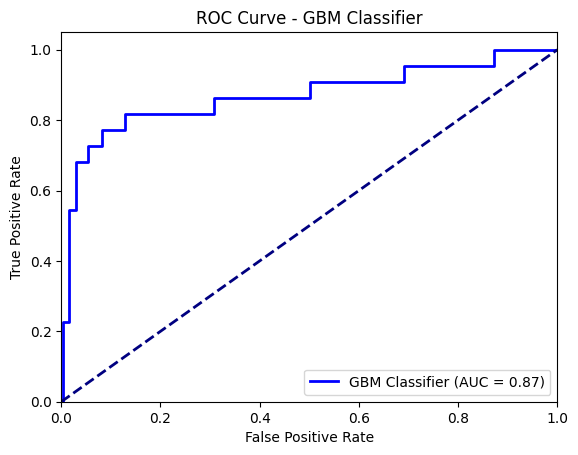

In [121]:
## ROC Curve

y_prob_gbm = best_gbm.predict_proba(X_test)[:, 1]
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_prob_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label='GBM Classifier (AUC = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GBM Classifier')
plt.legend(loc="lower right")
plt.show()

## Multi-Layer Perceptron (MLP)

In [122]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp = MLPClassifier(random_state=100)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy: ", mlp_accuracy*100)

MLP Accuracy:  86.0377358490566


MLP Accuracy:  86.0377358490566


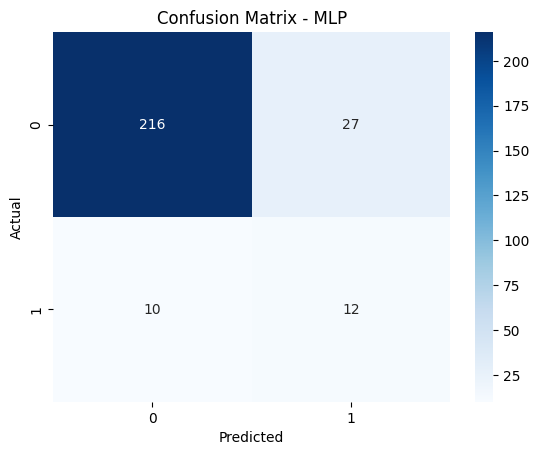

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       243
           1       0.31      0.55      0.39        22

    accuracy                           0.86       265
   macro avg       0.63      0.72      0.66       265
weighted avg       0.90      0.86      0.88       265



In [123]:
# Make predictions with the best model
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_cm = confusion_matrix(y_test, y_pred_mlp)
mlp_cls = classification_report(y_test, y_pred_mlp)

print("MLP Accuracy: ", mlp_accuracy*100)

sns.heatmap(mlp_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

print("MLP Classification Report:\n", mlp_cls)

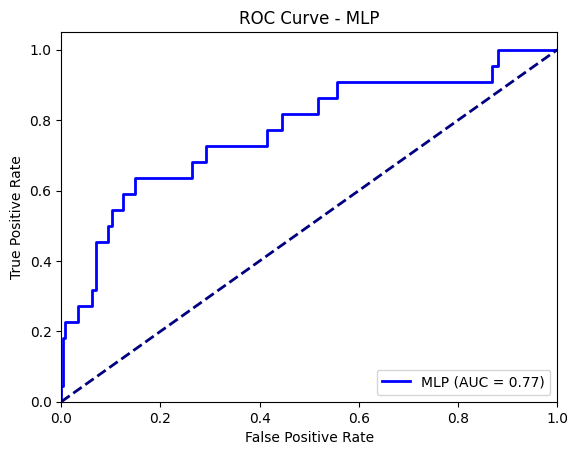

In [124]:
## ROC Curve

y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend(loc="lower right")
plt.show()

## Display Performance Metrics Table for Models

In [134]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

# Dictionary to store model performances
model_performance = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

# List of models (using fitted best_* models from previous tuning)
models = {
    'Logistic Regression': best_lr,
    'SVM': svm,
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'Gaussian Naive Bayes': gnb,
    'LightGBM': best_lgbm,
    'AdaBoost': best_ada,
    'XGBoost': best_xgb,
    'GBM' : best_gbm,
    'MLP': mlp
}

# Calculate performance metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    model_performance['Model'].append(model_name)
    model_performance['Precision'].append(precision)
    model_performance['Recall'].append(recall)
    model_performance['F1_Score'].append(f1)

# Convert to a DataFrame
performance_df = pd.DataFrame(model_performance)

# Sort the DataFrame by F1 Score in descending order
performance_df = performance_df.sort_values(by='F1_Score', ascending=False)

# Display the table
print(performance_df)

                   Model  Precision    Recall  F1_Score
8                XGBoost   0.727273  0.727273  0.727273
6               LightGBM   0.714286  0.681818  0.697674
9                    GBM   0.681818  0.681818  0.681818
4          Random Forest   0.565217  0.590909  0.577778
3          Decision Tree   0.413793  0.545455  0.470588
7               AdaBoost   0.333333  0.545455  0.413793
10                   MLP   0.307692  0.545455  0.393443
5   Gaussian Naive Bayes   0.238806  0.727273  0.359551
0    Logistic Regression   0.197674  0.772727  0.314815
2                    KNN   0.146341  0.272727  0.190476
1                    SVM   0.099291  0.636364  0.171779


## From the above models LightGBM performs best

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956

Testing Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       243
           1       0.71      0.68      0.70        22

    accuracy                           0.95       265
   macro avg       0.84      0.83      0.84       265
weighted avg       0.95      0.95      0.95       265



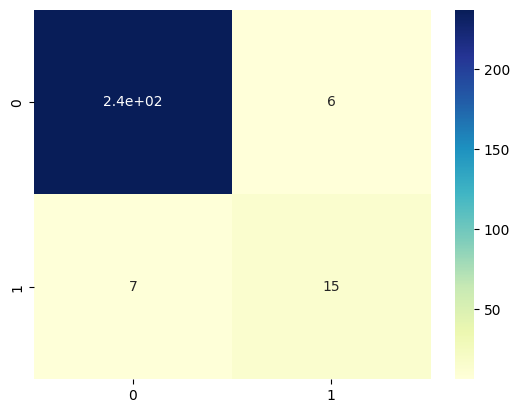

In [128]:
from xgboost import XGBClassifier

best_model = XGBClassifier()

# Train the model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Evaluate the model
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## Model Explainability

                       Feature  Importance
6                totalevecalls    1.993539
0                accountlength    2.534031
4                totaldaycalls    2.846387
5              totaleveminutes    2.956634
8              totalnightcalls    3.003080
7            totalnightminutes    4.335463
9             totalintlminutes    4.538112
2          numbervmailmessages    4.555407
10              totalintlcalls    6.334526
3              totaldayminutes    6.662828
1            internationalplan   25.669039
11  numbercustomerservicecalls   34.570957


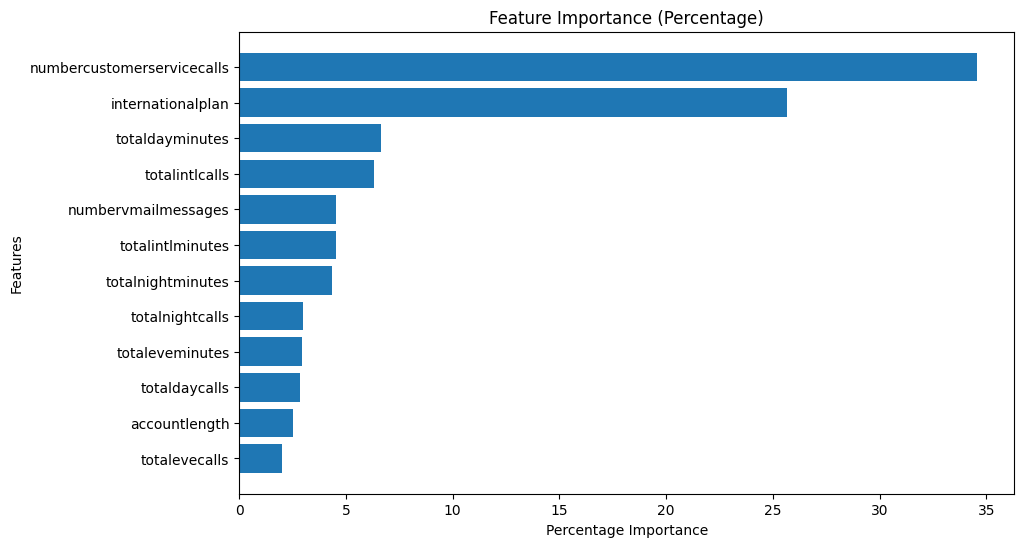

In [129]:
feature_importances = best_model.feature_importances_

# Convert to percentage
importance_percentage = 100.0 * (feature_importances / feature_importances.sum())

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importance_percentage
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)

# Print feature importance percentages
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Percentage Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Percentage)')
plt.show()

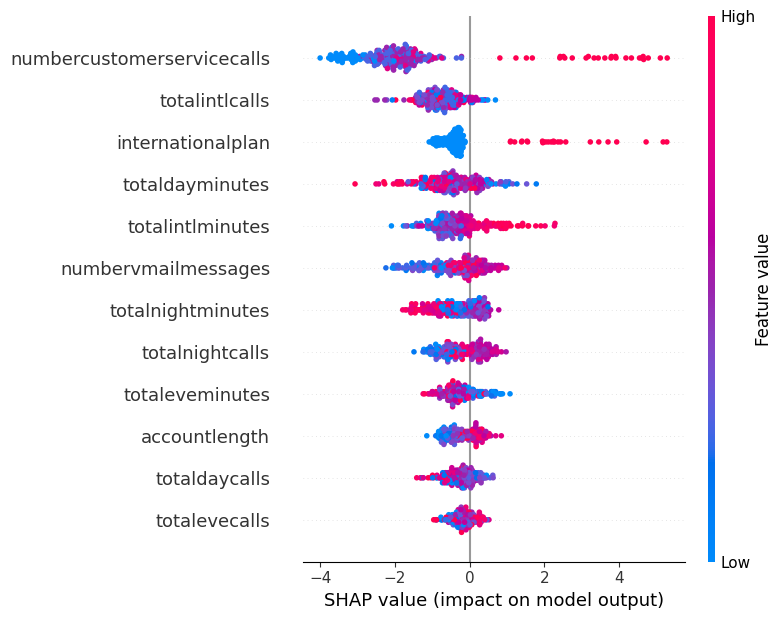

In [130]:
#Using SHAP Values
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [131]:
X_test.columns

Index(['accountlength', 'internationalplan', 'numbervmailmessages',
       'totaldayminutes', 'totaldaycalls', 'totaleveminutes', 'totalevecalls',
       'totalnightminutes', 'totalnightcalls', 'totalintlminutes',
       'totalintlcalls', 'numbercustomerservicecalls'],
      dtype='object')

In [132]:
from sklearn.inspection import PartialDependenceDisplay

best_ft = ['scaler__numbercustomerservicecalls', 'remainder__internationalplan', 'scaler__totaldayminutes', 'scaler__numbervmailmessages', 'scaler__totalnightcalls']
for col in best_ft:
    PartialDependenceDisplay.from_estimator(best_model, X_test, features=[col])
    plt.title(f"Partial Dependency Plot of {col}")
    plt.show()

ValueError: Feature 'scaler__numbercustomerservicecalls' not in feature_names